# Warranty Claims Fraud Prediction

The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity. The dataset is taken from Kaggle. The dataset contains 358 rows and 21 columns. 

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('df_Clean.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,0,South,Karnataka,Urban,Bangalore,Business,Entertainment,TV,0,0,...,1,2,0,15000.0,10,60,Manufacturer,0.5,Complaint,1
1,1,South,Karnataka,Rural,Bangalore,Business,Household,AC,1,1,...,0,0,0,20000.0,12,10,Dealer,1.0,Complaint,0
2,2,North,Haryana,Urban,Chandigarh,Personal,Household,AC,0,1,...,0,0,0,18000.0,14,10,Dealer,1.4,Claim,0
3,3,South,Tamil Nadu,Urban,Chennai,Business,Entertainment,TV,0,0,...,1,1,0,12000.0,16,20,Manufacturer,2.0,Complaint,0
4,4,North East,Jharkhand,Rural,Ranchi,Personal,Entertainment,TV,0,0,...,0,1,2,25000.0,15,6,Dealer,1.3,Claim,0


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        358 non-null    int64  
 1   Region            358 non-null    object 
 2   State             358 non-null    object 
 3   Area              358 non-null    object 
 4   City              358 non-null    object 
 5   Consumer_profile  358 non-null    object 
 6   Product_category  358 non-null    object 
 7   Product_type      358 non-null    object 
 8   AC_1001_Issue     358 non-null    int64  
 9   AC_1002_Issue     358 non-null    int64  
 10  AC_1003_Issue     358 non-null    int64  
 11  TV_2001_Issue     358 non-null    int64  
 12  TV_2002_Issue     358 non-null    int64  
 13  TV_2003_Issue     358 non-null    int64  
 14  Claim_Value       358 non-null    float64
 15  Service_Centre    358 non-null    int64  
 16  Product_Age       358 non-null    int64  
 1

In [4]:
df.nunique()

Unnamed: 0          358
Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64

## Data Cleaning

In [5]:
# Define a function for reduce uniques in categorical columns (State, City)
def category(x, dic):
    if x in dic.keys():
        return x 
    else :
        return 'Others'


state_dic = df['State'].value_counts().head(8)
df['State'] = df['State'].apply(lambda x : category(x, state_dic))

city_dic = df['City'].value_counts().head(8)
df['City'] = df['City'].apply(lambda x : category(x, city_dic))

In [6]:
# Apply lambda to change value 16 to 11 because of their same correlation with Fraud column
df['Service_Centre'] = df['Service_Centre'].apply(lambda x : 11 if x == 16 else x)

## Data Visualization

In [7]:
# Define list of Continuous columns Names
continuous = ['Claim_Value', 'Call_details', 'Product_Age']

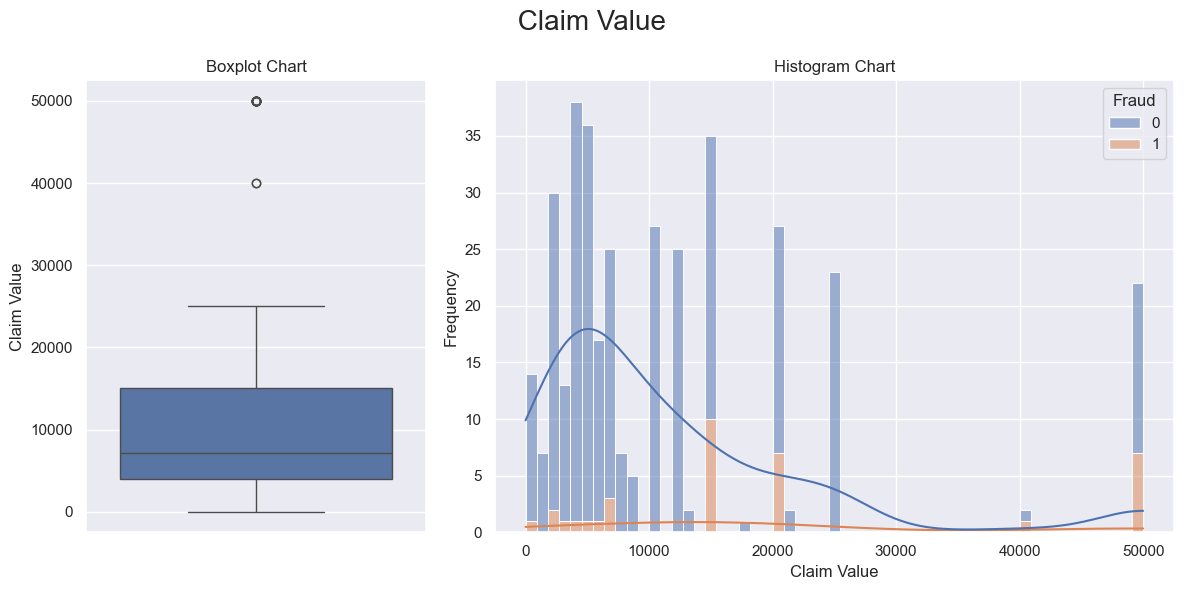

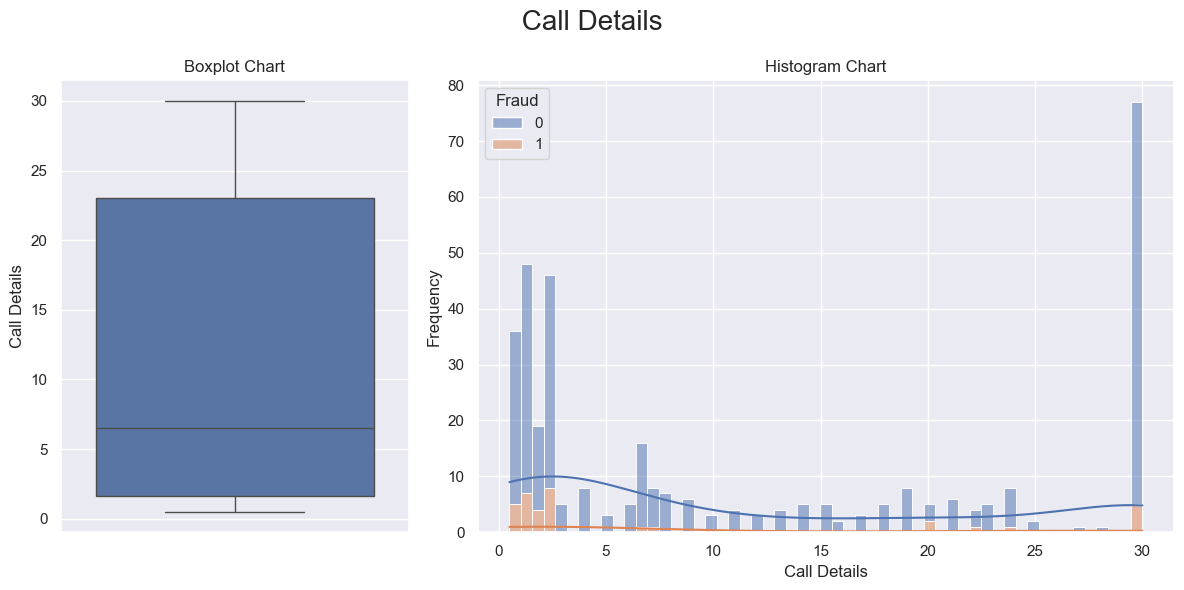

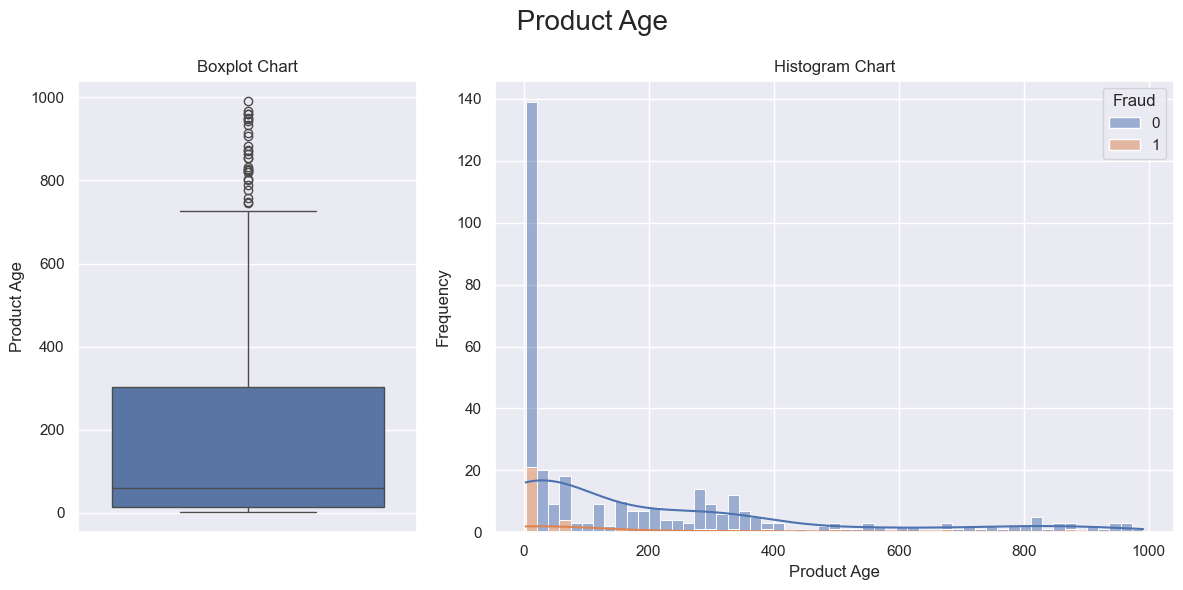

In [182]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Fraud')    

In [188]:
categorical = ['Area', 'Consumer_profile', 'Product_category', 'Product_type', 'Purchased_from', 'Purpose']

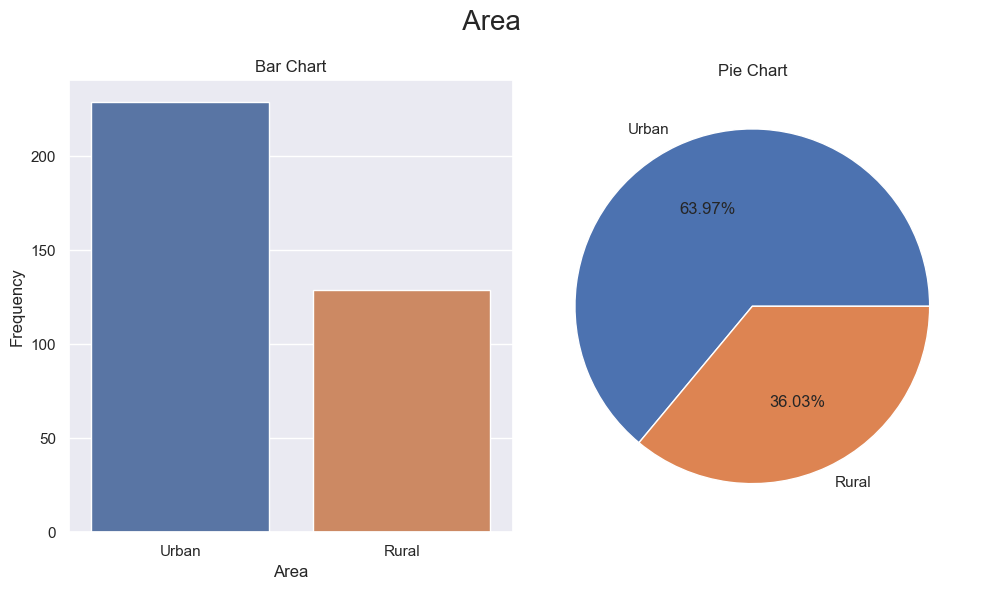

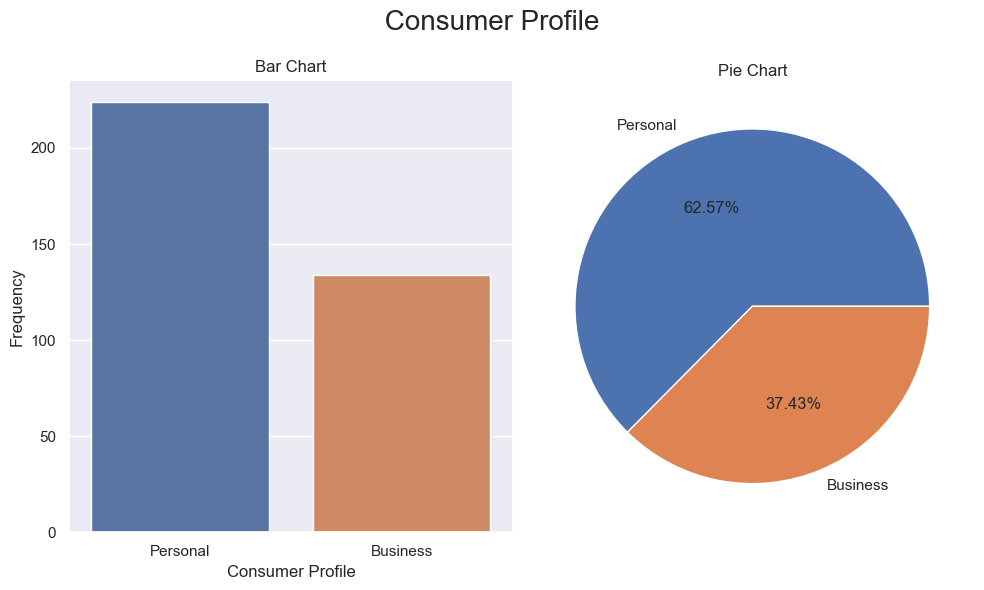

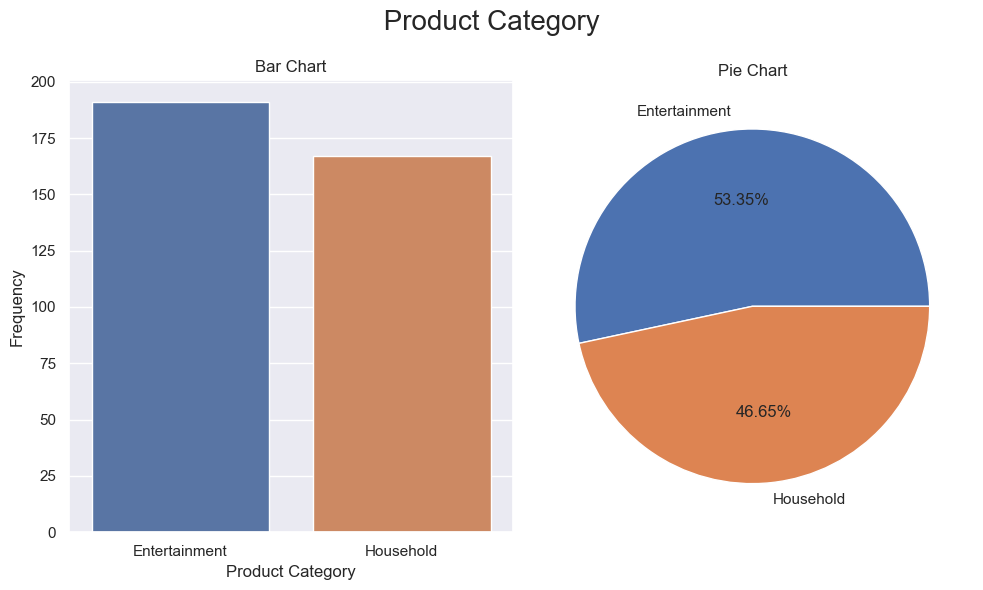

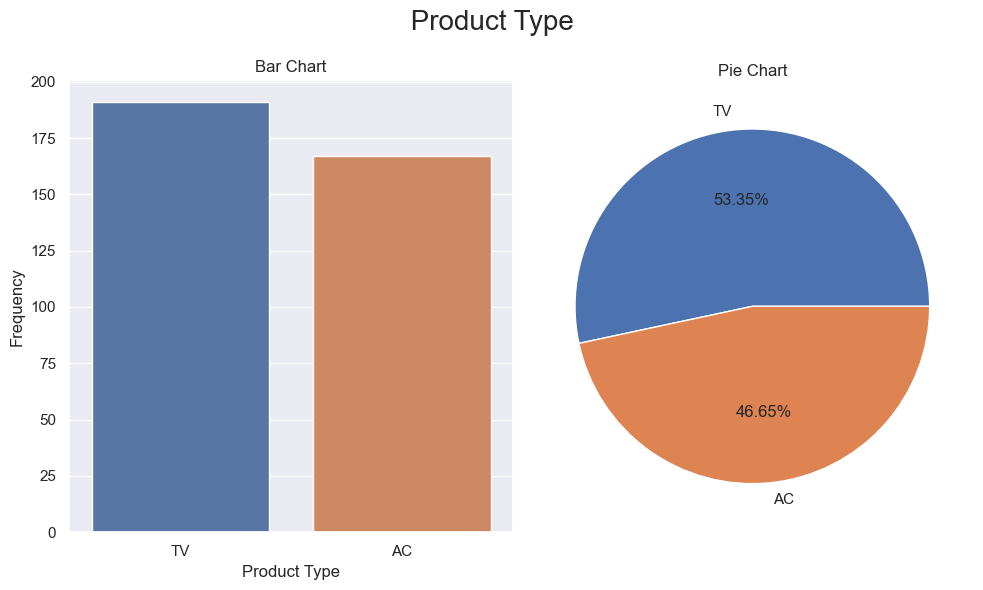

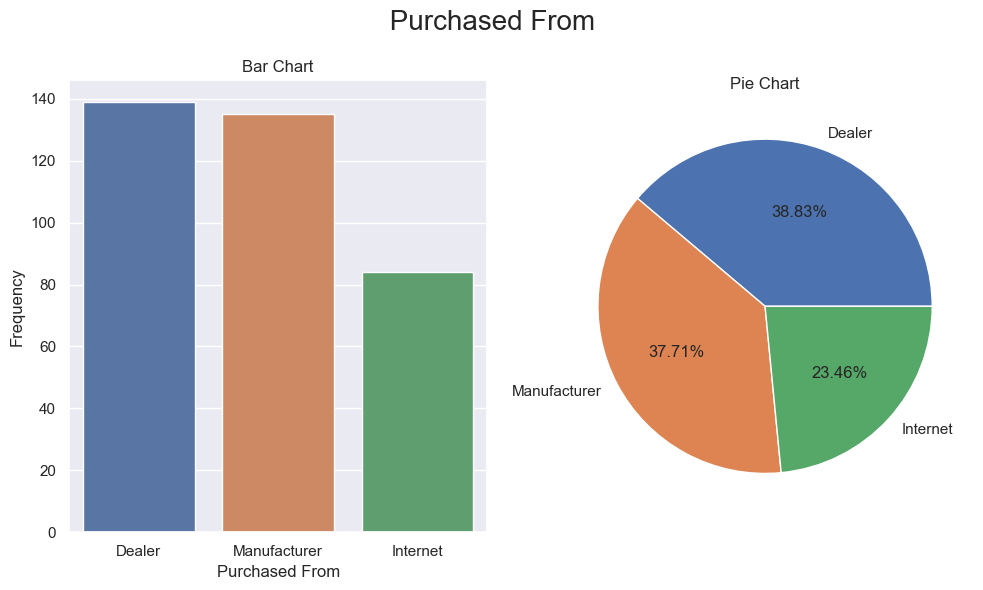

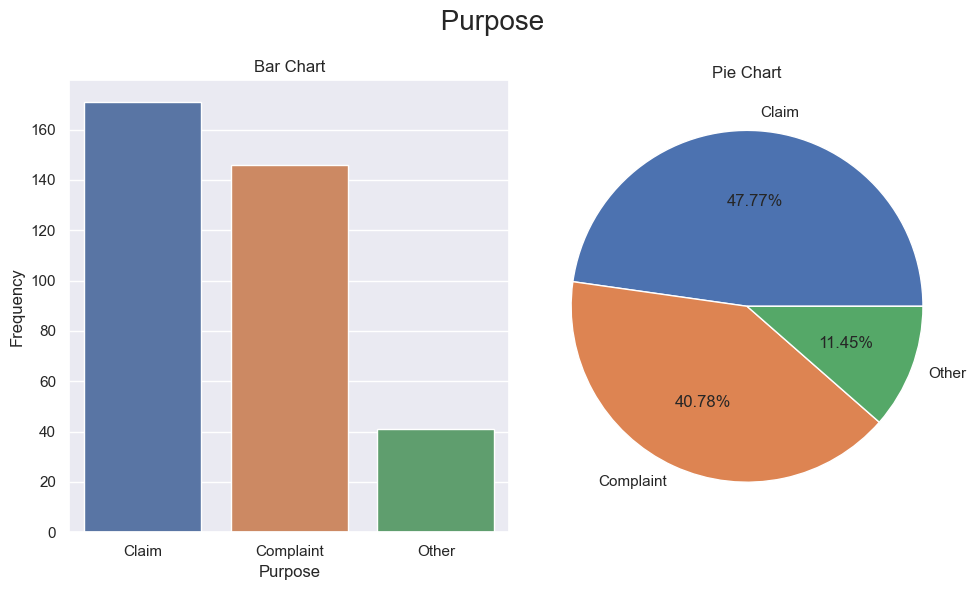

In [192]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.barplot(df[column].value_counts(), ax=ax[0], palette='deep')
    ax[0].set_title('Bar Chart')
    ax[0].set_xlabel(title(column))
    ax[0].set_ylabel('Frequency')
    
    
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_ylabel(None)
    
    plt.tight_layout()
    plt.show()
    
for cat in categorical:
    plot_categorical_distribution(df, cat)

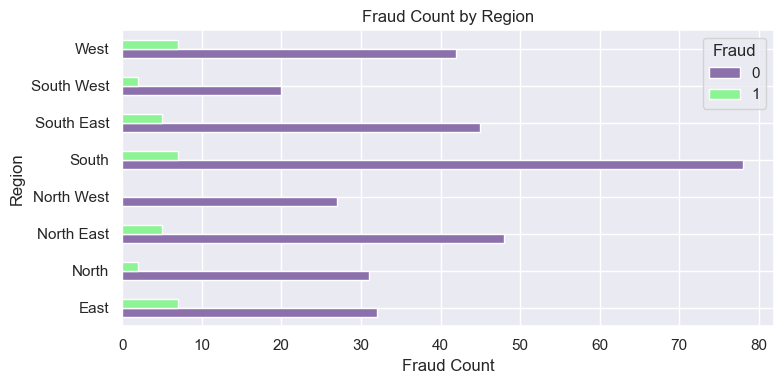

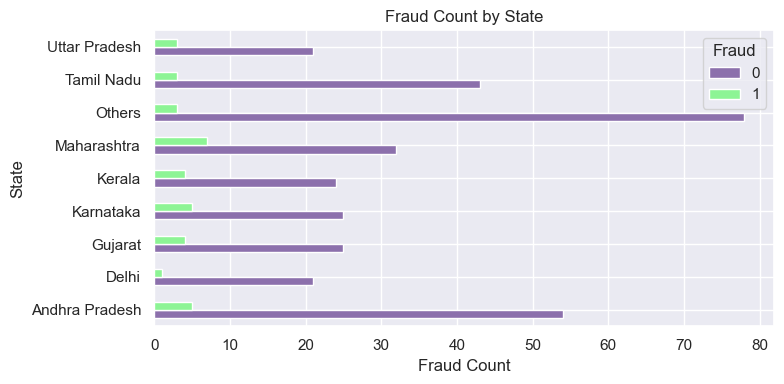

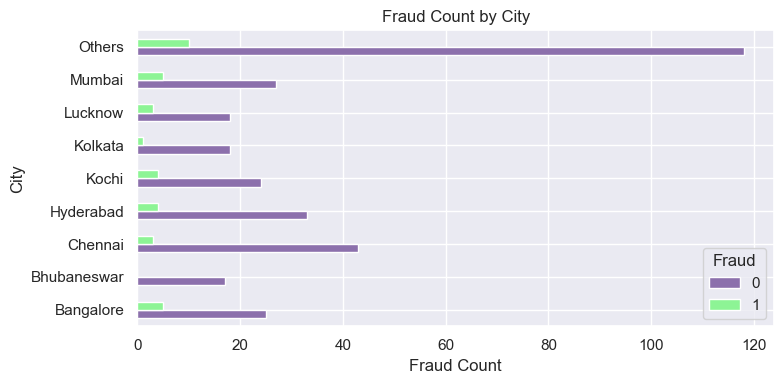

In [185]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#8c70ac', '#8df495'], figsize=(8,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Region', 'Fraud', df)
bar_plot('State', 'Fraud', df)
bar_plot('City', 'Fraud', df)

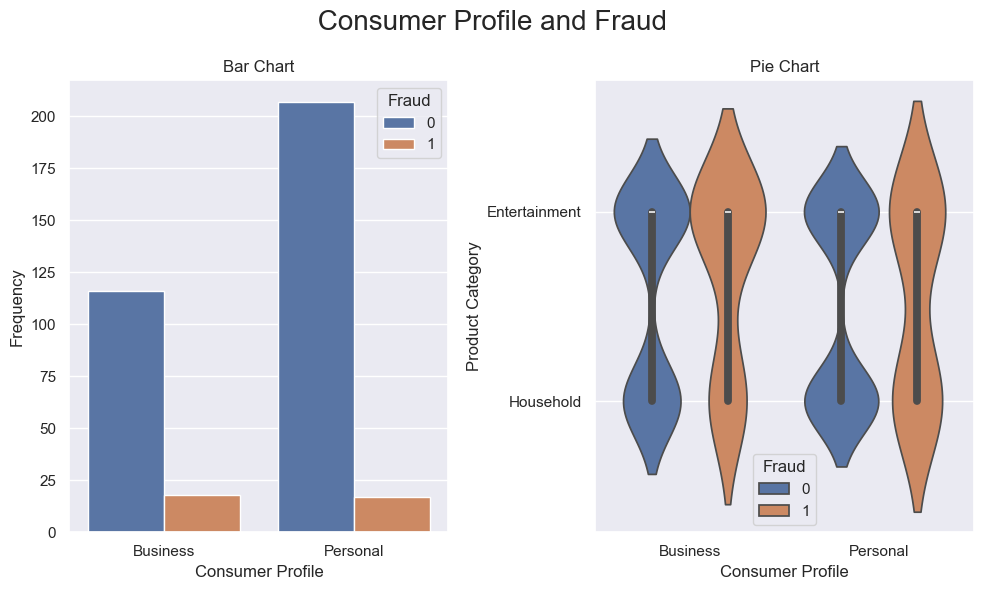

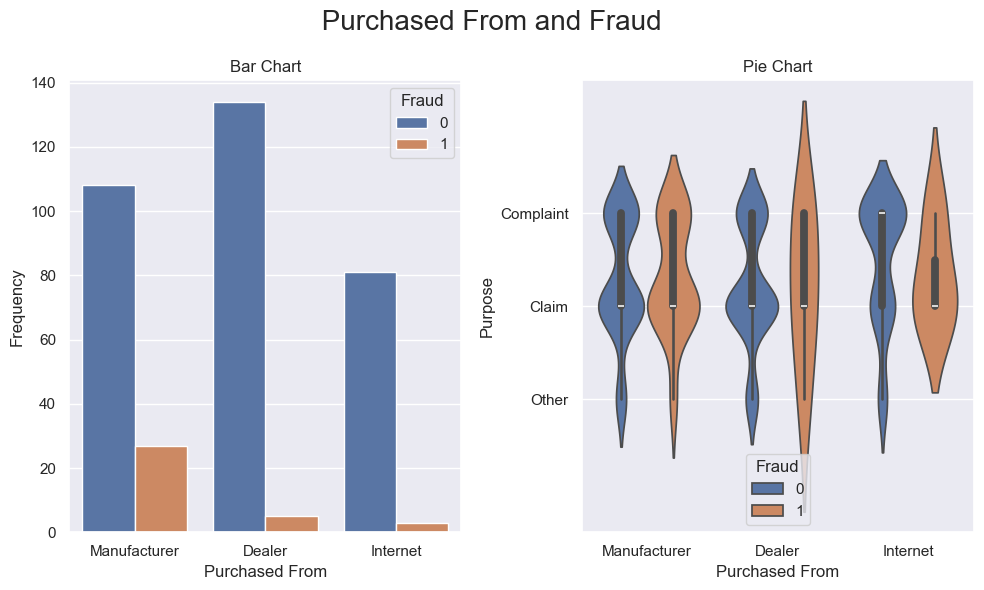

In [193]:
# distribution of categorical features

def plot_categorical(data, x, y, hue):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6)) 
    fig.suptitle(f' {title(x)} and {title(hue)} ', fontsize=20) 
    
    sns.countplot(x=x, hue=hue, data=data, ax=ax[0])
    ax[0].set_title('Bar Chart')
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(title(x))
    
    sns.violinplot(x=x, y=y, hue=hue, data=data, ax=ax[1])
    ax[1].set_title('Pie Chart')
    ax[1].set_xlabel(title(x))
    ax[1].set_ylabel(title(y))
    ax[1].legend(loc='lower center', title=hue)
    
    plt.tight_layout()
    plt.show()

plot_categorical(x='Consumer_profile', y='Product_category', hue='Fraud', data=df)
plot_categorical(x='Purchased_from', y='Purpose', hue='Fraud', data=df)

## Data Preprocessing

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

stc_cols = ['Call_details', 'Product_Age', 'Claim_Value']
le_cols = ['Product_type', 'Product_category', 'Consumer_profile', 'Area']
dum_cols = ['Purchased_from', 'Purpose', 'Service_Centre', 'TV_2003_Issue', 'TV_2002_Issue', 'TV_2001_Issue', 'AC_1003_Issue', 'AC_1002_Issue', 'AC_1001_Issue', 'City', 'State', 'Region']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply Label Encoder to the selected columns
for col in le_cols :
    df[col] = le.fit_transform(df[col])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [119]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Fraud', 'Unnamed: 0'], axis=1)
y = df['Fraud']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [25]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [55]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.972027972027972
Test accuracy: Gradient Boosting 0.9305555555555556

Training accuracy: K-Nearest Neighbors 0.9125874125874126
Test accuracy: K-Nearest Neighbors 0.9027777777777778

Training accuracy: Random Forest 0.972027972027972
Test accuracy: Random Forest 0.9027777777777778

Training accuracy: Decision Tree 0.972027972027972
Test accuracy: Decision Tree 0.8055555555555556

Training accuracy: XGB Classifier 0.972027972027972
Test accuracy: XGB Classifier 0.9166666666666666



In [104]:
#Craete a Object of Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Train and Evaluate the Model
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

accuracy = accuracy_score(y_test, gb_pred)
print(f'R-squared (Gradien Boosting Classifier): {round(accuracy, 3)}')

R-squared (Gradien Boosting Classifier): 0.931


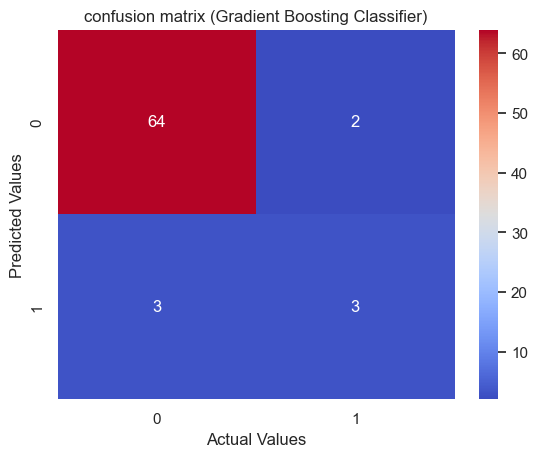

In [105]:
# Visualize confusion matrix for Gradient Boosting Classifier
sns.heatmap(confusion_matrix(y_test,gb_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Gradient Boosting Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [106]:
# Visualize Classification report for Gradient Boosting Classifier
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        66
           1       0.60      0.50      0.55         6

    accuracy                           0.93        72
   macro avg       0.78      0.73      0.75        72
weighted avg       0.93      0.93      0.93        72



### As we can see in the above cell , precision of our model in the '1' values of taget is too weak , so we gonna use of imblearn library for balancing values of target 

In [164]:
# redefine x and y
x = df.drop(['Fraud', 'Unnamed: 0'], axis=1)
y = df['Fraud']  # Target Variable

In [165]:
from imblearn.over_sampling import ADASYN

# Initialize ADASYN
adasyn = ADASYN()

# Apply ADASYN to the x and y 
x_resampled, y_resampled = adasyn.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [168]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 0.9825242718446602
Test accuracy: Gradient Boosting 0.9457364341085271

Training accuracy: K-Nearest Neighbors 0.9495145631067962
Test accuracy: K-Nearest Neighbors 0.9457364341085271

Training accuracy: Random Forest 0.9844660194174757
Test accuracy: Random Forest 0.9534883720930233

Training accuracy: Decision Tree 0.9844660194174757
Test accuracy: Decision Tree 0.9147286821705426

Training accuracy: XGB Classifier 0.9844660194174757
Test accuracy: XGB Classifier 0.9302325581395349



In [169]:
#Craete a Object of Random Forest Classifier
rf = RandomForestClassifier()

# Train and Evaluate the Model
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

accuracy = accuracy_score(y_test, rf_pred)
print(f'R-squared (Random Forest Classifier): {round(accuracy, 3)}')

R-squared (Random Forest Classifier): 0.953


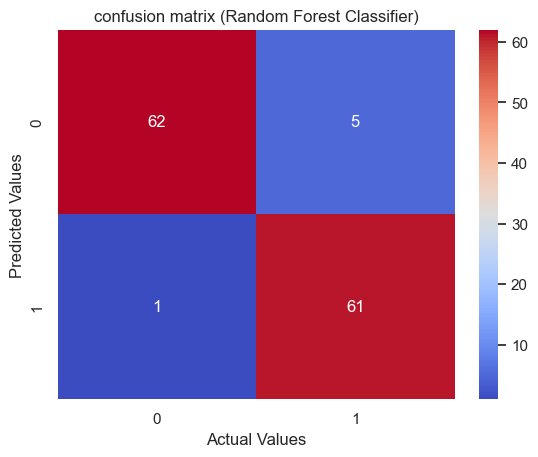

In [170]:
# Visualize confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Random Forest Classifier)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [171]:
# Visualize Classification report for Random Forest Classifier
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.92      0.98      0.95        62

    accuracy                           0.95       129
   macro avg       0.95      0.95      0.95       129
weighted avg       0.96      0.95      0.95       129



By employing the ADASYN method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting fraudulent warranty claims.

These findings demonstrate that utilizing class balancing techniques like ADASYN can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ ADASYN and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com